<h1 align="center"> k Neighrest Neighbour : k Vecinos más cercanos </h1>

<h2 align="center"> MEA - 2021 

Docente: José I. Robledo </h2>

In [130]:
# Cabecera
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

El objetivo de esta jupyter notebook es tomar intuición acerca del funcionamiento del algoritmo de k vecinos más cercanos (kNN). Este algoritmo es un método no paramétrico de clasificación, es decir donde no asumimos ninguna distribución subyacente en los datos. 

La letra *k* en nombre del método es un número entero que indica la cantidad de vecinos seleccionados. Si $k=1$, entonces el algoritmo se conoce como el del vecino más cercano, el cual sería el caso más simple. Supongamos que tenemos datos en dos dimensiones pertenecientes a dos clases A (rojo) y B (verde) y un dato $x$ que queremos predecir a qué clase pertenece:

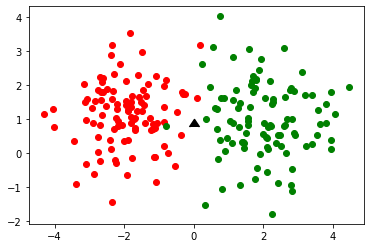

In [164]:
# Clases A y B
rng = np.random.RandomState(1)

A = np.array([rng.normal(-2, 1, 100),
              rng.normal(1, 1, 100)])

B = np.array([rng.normal(2, 1, 100),
              rng.normal(1, 1, 100)])

# Punto a predecir
x = (0, 1)

plt.scatter(*A, c='red')
plt.scatter(*B, c='green')
plt.scatter(*x, c='black', s=100, marker=6)
plt.show()

Los pasos del algoritmo kNN son los siguientes: 

-  El clasificador basado en el método kNN calcula alguna medida de distancia (normalmente la euclídea, pero puede ser la de Hamming, Manhattan, Minkowski, etc.) para encontrar los k vecinos más cercanos al punto a predecir. 

- Luego cuenta cuántos corresponden a cada clase.

- La clase más votada será la clase predicha por el algoritmo.    

Lo "malo" de este algoritmo, es que para encontrar los k vecinos más cercanos debe calcular las distancias a todos los puntos del conjunto de datos y luego ordenarlos de menor a mayor distancia para quedarse con los primeros k. Esto, a medida que la base de datos aumenta en $n$ y a su vez en dimensión $p$ se vuelve computacionalmente muy costo y lento. 

Vamos a hacerlo a mano para ver cómo funciona y luego vamos a ver la implementación de `scikit-learn`.

Primero definimos dos funciones, una que calcula la distancia euclídea y otra que encuentra los $k$ vecinos más cercanos a $x$ entre los puntos pertenecientes a los $datos$. Existen miles de maneras de hacer esto. Este ejemplo es de carácter didáctico.

In [165]:
def distancia_euclidea(x,y):
    '''Calcula la distancia euclídea del vector x'''
    return np.sqrt(sum([(xi - yi)**2 for xi, yi in zip(x,y)]))

def encontrar_k_vecinos(x, datos, k=3):
    '''Devuelve el índice de los k vecinos más cercanos'''
    distancia = [distancia_euclidea(x, dato) for dato in datos]
    primeros_vecinos = np.argsort(distancia)
    return primeros_vecinos[:k]
        

Deberemos juntar los datos de $A$ y $B$ dentro de un único conjunto de datos llamado "data". Luego utilizaremos la función `encontrar_k_vecinos()` con $k=10$ para encontrar los 10 puntos más cercanos a $x$. Tener en cuenta que hemos armado la función `encontrar_k_vecinos()` de manera tal que lo que nos devuelve es una array que contiene los índices en la base $data$ de los primeros $k$ vecinos a $x$. 

In [166]:
%%time
data = np.concatenate([A,B],axis=1).T
indice_de_k_vecinos = encontrar_k_vecinos(x, data, k=10)
indice_de_k_vecinos

Wall time: 3 ms


array([106,  67,   0,  47, 143, 104, 111,   6,  43, 152], dtype=int64)

Por lo tanto, para obtener los puntos en el gráfico, deberemos obtener las coordenadas que corresponde a cada índice de la siguiente manera: 

In [167]:
k_vecinos = np.array([data[i] for i in indice_de_k_vecinos]).T
k_vecinos

array([[ 0.34927873, -0.48018318, -0.37565464,  0.10025514,  0.60337958,
         0.66804833,  0.65732421, -0.25518824, -0.3075454 , -0.793085  ],
       [ 1.01335268,  1.2135339 ,  0.55287144,  1.61838026,  1.32352735,
         0.72090228,  1.30526704,  1.74055645,  1.75041164,  0.80494266]])

Estos los podemos graficar para ver que efectivamente encontramos los 10 puntos más cercanos.

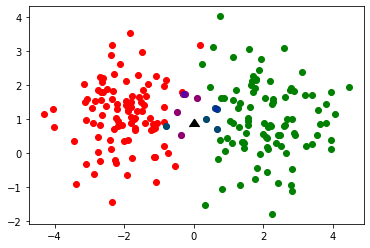

In [168]:
# Clases A y B
rng = np.random.RandomState(1)

A = np.array([rng.normal(-2, 1, 100),
              rng.normal(1, 1, 100)])

B = np.array([rng.normal(2, 1, 100),
              rng.normal(1, 1, 100)])

plt.scatter(*A, c='red')
plt.scatter(*B, c='green')
plt.scatter(*x, c='black', s=100, marker=6)

# Graficamos los k vecinos más cercanos
plt.scatter(*k_vecinos, c='blue', alpha=0.4)

plt.show()

Ahora, podemos armar una función para predecir la etiqueta del punto $x$ en cuestión. Para esto, debe contar entre los $k$ vecinos más cercanos, cuántos eran A y cuántos eran B y luego votar la etiqueta mayoritaria. Si la etiqueta predicha es 'grupo A' podemos pedirle que nos devuelva un 0 y si la etiqueta es 'grupo B' entonces que devuelva 1 :

In [172]:
def predecir_etiqueta(indices):
    '''Realiza la votación de clases'''
    n_clase_A = 0
    n_clase_B = 0
    for i in indices:
        if i <= 100:
            n_clase_A += 1
        else:
            n_clase_B += 1
    
    if n_clase_A >= n_clase_B:
        return 0
    else:
        return 1       

Como venimos haciendo en los ejercicios anteriores, podemos armar una grilla de puntos y predecir en cada punto la clasificación para poder visualizar la frontera de clasificación:

In [181]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for xi in np.c_[xx.ravel(), yy.ravel()]:
    k_vecinos = encontrar_k_vecinos(xi, data, k=5)
    prediccion = predecir_etiqueta(k_vecinos)
    Z.append(prediccion)

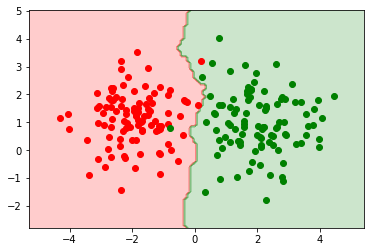

In [182]:
cmap = ListedColormap(["red","green"])
Z = np.array(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
plt.scatter(*A, c='red')
plt.scatter(*B, c='green')
plt.show()

## Implementación con `scikit-learn`

Ahora que entendemos mejor el algoritmo del clasificador de kNN, usemos la implementación de sklearn que se encuentra optimizada.

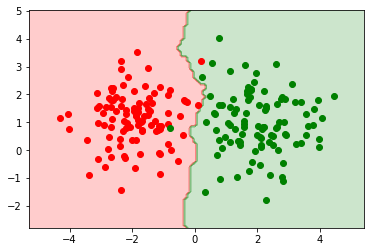

In [183]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5, 
                             weights='uniform',
                             algorithm='brute'
                             )
neigh.fit(data, np.array([0]*100+[1]*100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
cmap = ListedColormap(["red","green"])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
plt.scatter(*A, c='red')
plt.scatter(*B, c='green')
plt.show()

Como podemos ver, obtenemos lo mismo con un factor de al menos 15 veces de ganancia en tiempo de ejecución. Moraleja: Siempre que puedan, usen scikit learn antes de programar sus propias rutinas. 